# Lucid Circuit Task
**Shannon Brownlee**
- **Fall 2019** 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Importing data - needs to be changed based on where each person's data is stored
ca = "LucidCircuit/dat.csv"
tcs = "LucidCircuit/curves.csv"

In [4]:
# Formatting data to be used within the code and renaming each dataset
data1 = pd.read_csv(ca)
data2 = pd.read_csv(tcs)

## Data Visualization
It is useful to have a general way to visualize the given data before attempting to manipulate it or to use any machine learning models to make predictions based on it.

In [5]:
# To view what the dataframe for data1 looks like
data1.head()

,Arrest,Age_y,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11
0,1,63,0,0,0,0,0,0,1,0,0,0,0
1,1,63,0,0,0,0,0,0,0,0,1,0,0
2,1,60,1,0,0,0,1,1,0,1,0,0,0
3,1,70,0,0,0,0,0,1,0,0,0,1,0
4,1,54,0,1,0,0,0,0,0,0,0,1,1


In [6]:
# To view what the dataframe for data2 looks like
data2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,-0.714667,-0.897589,-0.529051,-0.464436,-0.567571,-0.679582,-0.473877,-0.393921,-0.229320,-0.713373,...,1.710186,1.315141,1.558143,1.188066,1.401991,1.469804,0.979407,1.496990,1.292152,1.389845
1,-0.617920,-0.695324,-0.339038,-0.251318,-0.024798,-0.106560,0.061924,-0.005979,-0.144702,0.038207,...,0.942037,1.075928,1.300646,1.035178,1.223987,1.183275,1.199120,0.655413,1.056601,0.971798
2,-0.652287,-0.447006,-0.650891,-0.484765,-0.390119,-0.486547,-0.493495,-0.610500,-0.191957,-0.967399,...,0.900975,0.747467,1.046727,1.108528,0.916690,1.061254,1.098566,1.436553,1.593959,1.615996
3,-2.062187,-1.836141,-2.031931,-1.687507,-1.324509,-1.602404,-1.879471,-1.622984,-1.473278,-1.291739,...,-0.473464,-0.363122,-0.550975,-0.689657,-0.620732,-0.372306,-0.742173,-0.411089,-0.923479,-0.769356
4,-0.478093,-0.522250,-0.232736,-0.564540,-1.016882,-1.101191,-0.658538,-0.791956,-1.169648,-1.581075,...,0.045517,-0.039422,0.117052,-0.021512,-0.046603,-0.233406,-0.222994,0.147450,-0.090553,0.211678


### To look at the data graphically, we'll plot some features with respect to cardiac arrest, since that's the main thing we're looking for.

In [7]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

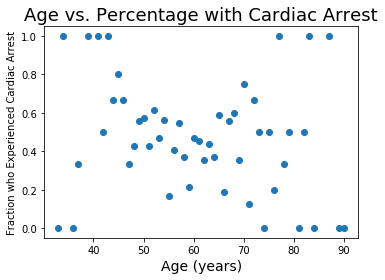

In [8]:
# Takes the average of the column "Arrest," giving the percentage of people at each unique age within the data who have had cardiac arrest
# Plots the percentage of people at each age who have had cardiac arrest as a scatter plot
averages = []
for a in data1['Age_y'].unique(): 
    ad = data1[data1["Age_y"]==a]
    count = ad["Arrest"].sum()/len(ad)
    averages.append(count)

plt.rcParams["figure.figsize"] = [5.5,4]
fig, ax = plt.subplots()
plt.plot(data1["Age_y"].unique(),averages,'o')


ax.set_xlabel('Age (years)', fontsize = 14)
ax.set_ylabel("Fraction who Experienced Cardiac Arrest", fontsize = 10)

plt.title("Age vs. Percentage with Cardiac Arrest", fontsize = 18)

fig.tight_layout()

plt.show()

The scatter plot above is very difficult to interpret for any useful data, however. Below is the same data, but represented as a bar graph for better interpretations.

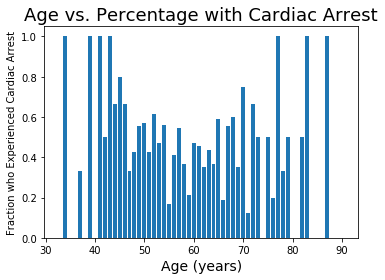

In [9]:
# Graphs as a bar graph the percentage of people within the data at each unique age who experienced cardiac arrest
plt.rcParams["figure.figsize"] = [5.5,4]
fig, ax = plt.subplots()
plt.bar(data1["Age_y"].unique(),averages)


ax.set_xlabel('Age (years)', fontsize = 14)
ax.set_ylabel("Fraction who Experienced Cardiac Arrest", fontsize = 10)

plt.title("Age vs. Percentage with Cardiac Arrest", fontsize = 18)

fig.tight_layout()

plt.show()

While the bar graph above is more easily interpretable, there are many columns and gaps in the age range due to gaps in the data, making it more difficult to see any correlation between age and cardiac arrest in the given data. A meaningful way to interpret the age gaps in this data would be a histogram, shown below.

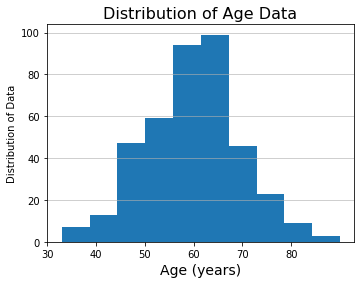

In [10]:
# Histogram representation of above age distribution
plt.hist(data1["Age_y"])
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Distribution of Data", fontsize=10)
plt.xticks(np.arange(30, 90, step=10))
plt.yticks([0,20,40,60,80,100])
plt.grid(axis='y', alpha=0.75)
plt.title('Distribution of Age Data', fontsize=16)
plt.show()

Looking at the histogram, it can be more easily seen that there are more data points for people in people within the age groups of 57-62 and 62-67. So, using this age data as a major prediction tool is risky since within the data there are significant gaps in age range, and many ages have a much lower (or even zero) incidence. The more data there is for a each age, or each age range, the more accurate a prediction based on ages will be; if, for instance, there is only one data point within the age range of 0-30 and that subject experienced cardiac arrest, the prediction for that age range will be 100% based on the data. The graphs above are almost certainly an inaccurate representation for the incidence of cardiac arrest within age ranges due to the incompleteness of the data. 

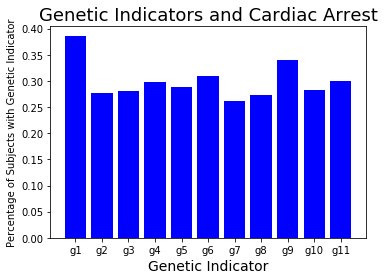

In [11]:
# take the averages of values in columns g1-g11; since the values are between 0 and 1, this gives the percentage of subjects with the genetic marker 
aveg1 = data1["g1"].mean()
aveg2 = data1["g2"].mean()
aveg3 = data1["g3"].mean()
aveg4 = data1["g4"].mean()
aveg5 = data1["g5"].mean()
aveg6 = data1["g6"].mean()
aveg7 = data1["g7"].mean()
aveg8 = data1["g8"].mean()
aveg9 = data1["g9"].mean()
aveg10 = data1["g10"].mean()
aveg11 = data1["g11"].mean()

# create arrays of labels for genetic markers and corresponding values
names = ["g1","g2","g3","g4","g5","g6","g7","g8","g9","g10","g11"]
values = [aveg1,aveg2,aveg3,aveg4,aveg5,aveg6,aveg7,aveg8,aveg9,aveg10,aveg11]

#Plots incidence of genetic marker on a bar graph
plt.rcParams["figure.figsize"] = [5.5,4]
fig, ax = plt.subplots()
plt.bar(names, values, color='b')

# Sets axis labels
ax.set_xlabel('Genetic Indicator', fontsize = 14)
ax.set_ylabel("Percentage of Subjects with Genetic Indicator", fontsize = 10)

# Sets graph title
plt.title("Genetic Indicators and Cardiac Arrest", fontsize = 18)

fig.tight_layout()

plt.show()

In [12]:
# Checks if any values in the array has missing values
pd.isnull(data2).any()

V1      False
V2      False
V3      False
V4      False
V5      False
        ...  
V496    False
V497    False
V498    False
V499    False
V500    False
Length: 500, dtype: bool

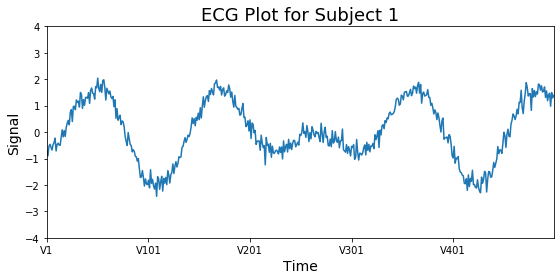

In [13]:
# graphs row 1 of data2 as a line graph
first_row = data2.iloc[0,:500]
plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()

# Set axes labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Signal", fontsize = 14)

# Set Axis Limits
ax.set_ylim(-4,4)

# Set graph title
plt.title("ECG Plot for Subject 1", fontsize = 18)

fig.tight_layout()

first_row.plot()
plt.show()

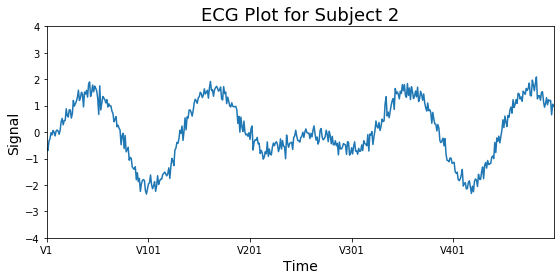

In [14]:
# graphs row 2 of data2 as a line graph
second_row = data2.iloc[1,:500]
plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()

# Set axes labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Signal", fontsize = 14)

# Set Axis Limits
ax.set_ylim(-4,4)

# Set graph title
plt.title("ECG Plot for Subject 2", fontsize = 18)

fig.tight_layout()

second_row.plot()
plt.show()

Plotting each subject's ECG data is tedious and would take a while to plot and look through. To make patterns in the ECG data more visible, we should take the average of each data point within the series and graph the new dataset.

In [15]:
#Joins data1 and data2 to create a single combined dataset
data = data1.join(data2)
data.head()

,Arrest,Age_y,g1,g2,g3,g4,g5,g6,g7,g8,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,1,63,0,0,0,0,0,0,1,0,...,1.710186,1.315141,1.558143,1.188066,1.401991,1.469804,0.979407,1.496990,1.292152,1.389845
1,1,63,0,0,0,0,0,0,0,0,...,0.942037,1.075928,1.300646,1.035178,1.223987,1.183275,1.199120,0.655413,1.056601,0.971798
2,1,60,1,0,0,0,1,1,0,1,...,0.900975,0.747467,1.046727,1.108528,0.916690,1.061254,1.098566,1.436553,1.593959,1.615996
3,1,70,0,0,0,0,0,1,0,0,...,-0.473464,-0.363122,-0.550975,-0.689657,-0.620732,-0.372306,-0.742173,-0.411089,-0.923479,-0.769356
4,1,54,0,1,0,0,0,0,0,0,...,0.045517,-0.039422,0.117052,-0.021512,-0.046603,-0.233406,-0.222994,0.147450,-0.090553,0.211678


In [16]:
# Normalize dataset to (-1,1)
for c in data.columns: 
    if (c[0]=='g'):
        data[c] = 2*data[c]-1

In [17]:
# Separates data into two datasets: data_zero where subjects did not have cardiac arrest and data_one where subjects had cardiac arrest
data_zero = data[data['Arrest']==0]
data_one = data[data["Arrest"]==1]

In [18]:
# In order to graph line plots of data separated by whether or not the subject experienced cardiac arrest, we need a dataset of only cardiac arrest and ECG data
# This is achieved by dropping all columns except "Arrest" and "V0"-"V500"
data_zero_graph = data_zero.drop(columns = ["Age_y","g1","g2","g3","g4","g5","g6","g7","g8","g9","g10","g11"])
data_one_graph = data_one.drop(columns = ["Age_y","g1","g2","g3","g4","g5","g6","g7","g8","g9","g10","g11"])

In [19]:
# By averaging each column within both the data_zero_graph and data_one_graph datasets, we can get average graphs of cardiac arrest/non cardiac arrest subjects' ECG data
data_zero_avg = data_zero_graph.mean()
data_one_avg = data_one_graph.mean()

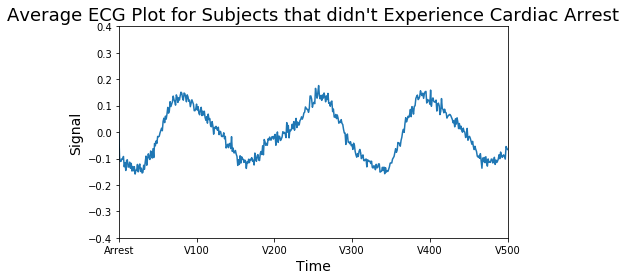

In [20]:
#averaged line plot for subjects that didn't experiece cardiac arrest
plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()

# Set axes labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Signal", fontsize = 14)

# Set Axis Limits
ax.set_ylim(-0.4,0.4)

# Set graph title
plt.title("Average ECG Plot for Subjects that didn't Experience Cardiac Arrest", fontsize = 18)

fig.tight_layout()

data_zero_avg.plot()
plt.show()

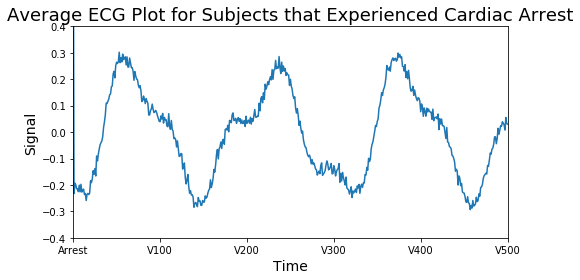

In [21]:
#averaged line plot for subjects that experienced cardiac arrest
plt.rcParams["figure.figsize"] = [8,4]
fig, ax = plt.subplots()

# Set Axes Labels
ax.set_xlabel("Time", fontsize = 14)
ax.set_ylabel("Signal", fontsize = 14)

# Set Axis Limits
ax.set_ylim(-0.4,0.4)

# Set graph title
plt.title("Average ECG Plot for Subjects that Experienced Cardiac Arrest", fontsize = 18)

fig.tight_layout()

data_one_avg.plot()
plt.show()

Based on the line graphs above, there are specific visual differences between average ECG graphs of subjects that experienced cardiac arrest and those who did not. The amplitude of the graph of those who experienced cardiac arrest is approximately 10% greater than the amplitude of those who did not experience cardiac arrest. There is also a less gradual incline/decline (smaller average slope) on the graph of subjects who experienced cardiac arrest. Furthermore, there are significant interruptions in the inclines and declines in the graph of those who experienced cardiac arrest; these interruptions are not present in the graph of subjects who did not experience cardiac arrest. While these graphs are not the best prediction tools since they are averages of the given data within each category and take into account outliers, they do still give a general visual idea of differences between the ECGs of cardiac arrest vs non cardiac arrest patients.

## Machine Learning Modeling
To be able to make accurate predictions from this data, we should run it through at least a few models and compare the accuracies. It's always good to start with a couple of basic classifiers (such as Naive Bayes, k Nearest Neighbors, Logistic Regression, Decision Trees, etc.), and then move on to more complex models (such as neural networks). 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [23]:
# Separates data to predict arrest by creating a dataset of arrest values and another dataset of all the other information
x = data.drop(columns = ['Arrest'])
y = data ['Arrest']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

In [24]:
# Run data through Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=1)
clf.fit(x_train, y_train)

pred = clf.predict(x_test)
scores = clf.predict_proba(x_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, pred))
print('AUROC: ', roc_auc_score(y_test, scores))
print(classification_report(y_test, pred))

Accuracy:  0.575
AUROC:  0.46997442455242966
              precision    recall  f1-score   support

           0       0.60      0.81      0.69       115
           1       0.50      0.26      0.34        85

    accuracy                           0.57       200
   macro avg       0.55      0.53      0.51       200
weighted avg       0.56      0.57      0.54       200



The accuracy of applying Naive Bayes to this dataset isn't very good, so let's try a different classifier that may be more suited to the data.

In [25]:
# Run data through K Nearest Neighbors classifier
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=10, weights='distance')
clf.fit(x_train, y_train)

pred = clf.predict(x_test)
scores = clf.predict_proba(x_test)[:,1]

print('Accuracy: ', accuracy_score(y_test, pred))
print('AUROC: ', roc_auc_score(y_test, scores))
print(classification_report(y_test, pred))

Accuracy:  0.78
AUROC:  0.7940664961636829
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       115
           1       0.78      0.67      0.72        85

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.78       200



The accuracy of applying K Nearest Neighbors to this data is significantly better than the accuracy when it's run through Naive Bayes, but it's still not super accurate and wouldn't be a great prediction tool. Training a neural network would likely be a better way to train for more accurate predictions.

In [26]:
# Checks whether both x_train and y_train datasets are the same format
print(type(x_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [27]:
# Since x_train and y_train are not the same format, y_train needs to be changed into a dataframe
y_trainNN = y_train.to_frame().reset_index()

In [28]:
# Now both x_train and y_trainNN are in the same format
print(type(x_train))
print(type(y_trainNN))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [29]:
# Converts both x_train and y_trainNN to numpy dataframes for ease of use within the neural network
x_trainnp = x_train.to_numpy()
y_trainnp = y_trainNN.to_numpy()

In [30]:
# Trains a neural network with 3 hidden layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=2, activation='softmax'))

# Sigmoid function is used since data is normalized from -1 to 1
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.fit(x_trainnp, y_trainnp, epochs=10, batch_size=16)

Train on 200 samples
Epoch 1/10
200/200 [==============================] - 1s 5ms/sample - loss: nan - accuracy: 0.9950
Epoch 2/10
200/200 [==============================] - 0s 190us/sample - loss: nan - accuracy: 0.9950
Epoch 3/10
200/200 [==============================] - 0s 115us/sample - loss: nan - accuracy: 0.9950
Epoch 4/10
200/200 [==============================] - 0s 138us/sample - loss: nan - accuracy: 0.9950
Epoch 5/10
200/200 [==============================] - 0s 138us/sample - loss: nan - accuracy: 0.9950
Epoch 6/10
200/200 [==============================] - 0s 126us/sample - loss: nan - accuracy: 0.9950
Epoch 7/10
200/200 [==============================] - 0s 160us/sample - loss: nan - accuracy: 0.9950
Epoch 8/10
200/200 [==============================] - 0s 182us/sample - loss: nan - accuracy: 0.9950
Epoch 9/10
200/200 [==============================] - 0s 189us/sample - loss: nan - accuracy: 0.9950
Epoch 10/10
200/200 [==============================] - ETA: 0s - loss: n

Since the accuracy for the basic neural net is very high, there is little need to try running the data through another architecture unless more labeled data is introduced and a lower accuracy is achieved. 

While the model above achieves a high accuracy, there are certain computational costs that must be taken into account when utlising neural networks for data analysis. For instance, a large volume of data is needed to have a model with the desired accuracy, the volume of training vs test data should be distributed between both outcomes well enough to give an accurate model and accuracy measurement, and it is hard to determine which hyper-parameters would be the best for the network.

Since timing is of the essence in this prediction problem, it is integral to assess whether continuous signal information is informative about the probability of experiencing cardiac arrest well before the onset time. While considering the continuous signal information led to a very accurate neural network, it is possible that not taking into account the continuous signal information or taking into account less, noncontinuous signal information would still lead to an accurate outcome. This question could be considered by training a recurrent neural network with the sequential data and averaging the predictions of that with the predictions of a neural network trained on the rest of the data to have a final prediction outcome based on both of those, while also being able to see the individual accuracies of models based on the time series data vs the non-sequential data. Another useful tool in helping predict the probability of a subject experiencing cardiac arrest that would be applicable well before the onset time is doing some feature engineering possibly with variance, frequency, range, and min/max values. 